<a href="https://colab.research.google.com/github/akash99955/AML/blob/main/AML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


================ Logistic Regression ================
Accuracy : 0.807035519125683
Precision: 0.8004130968725148
Recall   : 0.807035519125683
F1-Score : 0.7976945011827921

Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.94      0.88      1889
     neutral       0.68      0.54      0.60       580
    positive       0.83      0.62      0.71       459

    accuracy                           0.81      2928
   macro avg       0.78      0.70      0.73      2928
weighted avg       0.80      0.81      0.80      2928


================ Gaussian Naive Bayes ================
Accuracy : 0.44672131147540983
Precision: 0.6274937655761956
Recall   : 0.44672131147540983
F1-Score : 0.48129304445990934

Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.44      0.57      1889
     neutral       0.27      0.31      0.29       580
    positive       0.24      0.67      0.35       459


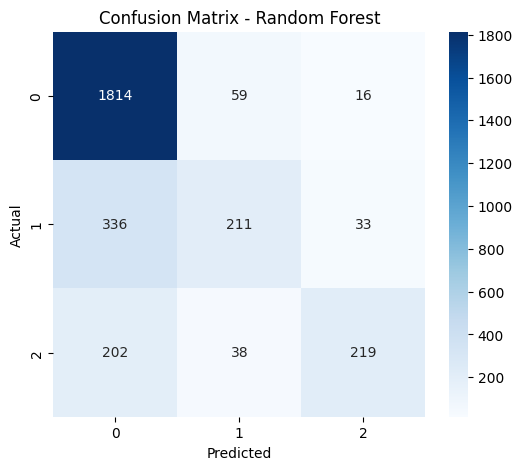


================ MODEL COMPARISON ================
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.807036   0.800413  0.807036  0.797695
1          Gaussian NB  0.446721   0.627494  0.446721  0.481293
2        Random Forest  0.766393   0.761381  0.766393  0.740481


In [ ]:
# ================================================================
# 1. IMPORT LIBRARIES
# ================================================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


# ================================================================
# 2. LOAD DATASET
# ================================================================
df = pd.read_csv("/content/Tweets.csv")

# CHANGE THESE ACCORDING TO YOUR CSV
TEXT = "text"      # column name containing the tweet
LABEL = "airline_sentiment"    # column name containing sentiment/category

df = df[[TEXT, LABEL]].dropna()


# ================================================================
# 3. BASIC TEXT CLEANING
# ================================================================
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^a-zA-Z ]", "", text)
    return text

df["clean_text"] = df[TEXT].apply(clean_text)


# ================================================================
# 4. TRAIN–TEST SPLIT + TF-IDF
# ================================================================
X = df["clean_text"]
y = df[LABEL]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

# Gaussian NB requires dense matrix:
X_train_dense = X_train_tf.toarray()
X_test_dense = X_test_tf.toarray()


# ================================================================
# 5. TRAIN MODELS
# ================================================================

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tf, y_train)
lr_pred = lr.predict(X_test_tf)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_dense, y_train)
gnb_pred = gnb.predict(X_test_dense)

# Random Forest
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train_tf, y_train)
rf_pred = rf.predict(X_test_tf)


# ================================================================
# 6. EVALUATION FUNCTION
# ================================================================
def evaluate(y_true, y_pred, name):
    print(f"\n================ {name} ================")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall   :", recall_score(y_true, y_pred, average='weighted'))
    print("F1-Score :", f1_score(y_true, y_pred, average='weighted'))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))


# Show metrics for each model
evaluate(y_test, lr_pred, "Logistic Regression")
evaluate(y_test, gnb_pred, "Gaussian Naive Bayes")
evaluate(y_test, rf_pred, "Random Forest")


# ================================================================
# 7. CONFUSION MATRIX (Random Forest)
# ================================================================
cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ================================================================
# 8. MODEL COMPARISON TABLE
# ================================================================
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Gaussian NB", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, gnb_pred),
        accuracy_score(y_test, rf_pred)
    ],
    "Precision": [
        precision_score(y_test, lr_pred, average='weighted'),
        precision_score(y_test, gnb_pred, average='weighted'),
        precision_score(y_test, rf_pred, average='weighted')
    ],
    "Recall": [
        recall_score(y_test, lr_pred, average='weighted'),
        recall_score(y_test, gnb_pred, average='weighted'),
        recall_score(y_test, rf_pred, average='weighted')
    ],
    "F1 Score": [
        f1_score(y_test, lr_pred, average='weighted'),
        f1_score(y_test, gnb_pred, average='weighted'),
        f1_score(y_test, rf_pred, average='weighted')
    ]
})

print("\n================ MODEL COMPARISON ================")
print(results)

Data loaded successfully. Total reviews: 14640

Training Samples: 11712 | Testing Samples: 2928
TF-IDF Matrix Shape (Train): (11712, 5000)

Training Logistic Regression model...
Training complete.

Model Accuracy (Logistic Regression): 0.7753

Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.95      0.86      1835
     neutral       0.66      0.41      0.51       620
    positive       0.81      0.56      0.66       473

    accuracy                           0.78      2928
   macro avg       0.75      0.64      0.68      2928
weighted avg       0.77      0.78      0.76      2928



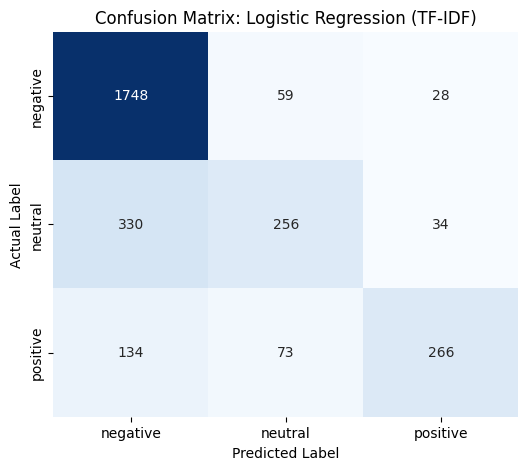


New Review: 'This film was absolutely spectacular. A must-watch masterpiece!'
Predicted Sentiment: negative

--- Next Steps for Coursework ---
1. Implement a second model (e.g., **LSTM** or **BERT**) as required for comparison.
2. Add extensive data exploration (e.g., word clouds, sentiment distribution charts).
3. Add detailed documentation and discussion to your Jupyter Notebook.


In [ ]:
# ==============================================================================
# Step 1: Install and Import Necessary Libraries
# ==============================================================================
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# To ensure consistent results
np.random.seed(42)

# ==============================================================================
# Step 2: Load the Dataset
#
# NOTE: This code assumes you have the 'IMDB Dataset.csv' file in the same
# directory as your Jupyter Notebook, which is the standard format for the
# 50,000 movie reviews dataset.
# ==============================================================================
try:
    data = pd.read_csv('/content/Tweets.csv')
    print("Data loaded successfully. Total reviews:", len(data))
except FileNotFoundError:
    print("Error: 'IMDB Dataset.csv' not found.")
    print("Please download the dataset and place it in the notebook directory.")
    # Create a dummy DataFrame for demonstration if the file is missing
    data = pd.DataFrame({
        'review': [
            "A fantastic movie with brilliant acting. I loved every minute of it.",
            "This was the most terrible film I've ever seen. Pure garbage.",
            "It started slow but finished strong, a decent watch.",
            "Absolutely horrible plot and cinematography. Waste of time."
        ],
        'sentiment': ['positive', 'negative', 'positive', 'negative']
    })
    print("Using dummy data for demonstration.")


# ==============================================================================
# Step 3: Data Preprocessing and Cleaning
# ==============================================================================

def clean_text(text):
    """
    Function to clean the movie review text.
    IMDb reviews often contain HTML tags, which must be removed.
    """
    text = text.lower()

    # 1. Remove HTML tags (e.g., <br />, </a>)
    text = re.sub('<.*?>', '', text)

    # 2. Remove special characters and numbers (keeping only letters)
    text = re.sub(r'[^a-z\s]', ' ', text)

    # 3. Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the cleaning function to the 'text' column from Tweets.csv
data['cleaned_review'] = data['text'].apply(clean_text)

# We will use the 'airline_sentiment' column directly for the target variable (y)
# as Logistic Regression in scikit-learn can handle string labels for multi-class classification.
# The previous cell also used string labels.
# Removed the data['sentiment_encoded'] mapping as it's not needed with string labels.

X = data['cleaned_review']
y = data['airline_sentiment'] # Directly use the string labels

# ==============================================================================
# Step 4: Split Data and Feature Extraction (Vectorization)
# ==============================================================================

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining Samples: {len(X_train)} | Testing Samples: {len(X_test)}")

# Initialize TF-IDF Vectorizer
# max_features is used to limit vocabulary size, improving speed and performance
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))

# Fit the vectorizer on the training data and transform both train and test sets
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"TF-IDF Matrix Shape (Train): {X_train_tfidf.shape}")

# ==============================================================================
# Step 5: Train the Logistic Regression Model
# ==============================================================================

# Initialize the Logistic Regression model
lr_model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)

# Train the model
print("\nTraining Logistic Regression model...")
lr_model.fit(X_train_tfidf, y_train)
print("Training complete.")

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test_tfidf)

# ==============================================================================
# Step 6: Evaluate Model Performance (Required Metrics & Visualization)
# ==============================================================================

# 1. Accuracy Score
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"\nModel Accuracy (Logistic Regression): {accuracy:.4f}")

# 2. Classification Report (includes Precision, Recall, and F1-score)
print("\nClassification Report:")
# Updated target_names for multi-class sentiment
print(classification_report(y_test, y_pred_lr, target_names=['negative', 'neutral', 'positive']))

# 3. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive']) # Updated ticklabels
plt.title('Confusion Matrix: Logistic Regression (TF-IDF)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# ==============================================================================
# Milestone 1 Task: Prediction Function
# ==============================================================================

def predict_sentiment_lr(review_text):
    """Predicts the sentiment of a new review using the trained LR model."""
    # 1. Clean the text
    cleaned_text = clean_text(review_text)

    # 2. Vectorize the text using the fitted TF-IDF model
    review_tfidf = tfidf_vectorizer.transform([cleaned_text])

    # 3. Predict the sentiment
    prediction = lr_model.predict(review_tfidf)[0]

    # 4. Return the predicted string result for multi-class classification
    return prediction

# Example Prediction
new_review = "This film was absolutely spectacular. A must-watch masterpiece!"
predicted_sentiment = predict_sentiment_lr(new_review)
print(f"\nNew Review: '{new_review}'")
print(f"Predicted Sentiment: {predicted_sentiment}")

# ==============================================================================
# Next Step Reminder for Coursework
# ==============================================================================
print("\n--- Next Steps for Coursework ---")
print("1. Implement a second model (e.g., **LSTM** or **BERT**) as required for comparison.")
print("2. Add extensive data exploration (e.g., word clouds, sentiment distribution charts).")
print("3. Add detailed documentation and discussion to your Jupyter Notebook.")


Data loaded successfully. Total reviews: 14640

Training Samples: 11712 | TF-IDF Matrix Size: (11712, 10000)

--- Training Logistic Regression ---
Logistic Regression trained in 0.15 seconds.
Accuracy: 0.7729
F1-Score: 0.7536

Classification Report:
               precision    recall  f1-score   support

    negative       0.79      0.95      0.86      1835
     neutral       0.67      0.41      0.51       620
    positive       0.81      0.55      0.66       473

    accuracy                           0.77      2928
   macro avg       0.75      0.64      0.68      2928
weighted avg       0.76      0.77      0.75      2928


--- Training Multinomial Naive Bayes ---
Multinomial Naive Bayes trained in 0.04 seconds.
Accuracy: 0.7169
F1-Score: 0.6617

Classification Report:
               precision    recall  f1-score   support

    negative       0.71      0.99      0.82      1835
     neutral       0.72      0.21      0.32       620
    positive       0.86      0.33      0.47       473



/tmp/ipython-input-2058501068.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_plot, y=f1_scores_plot, palette='viridis')


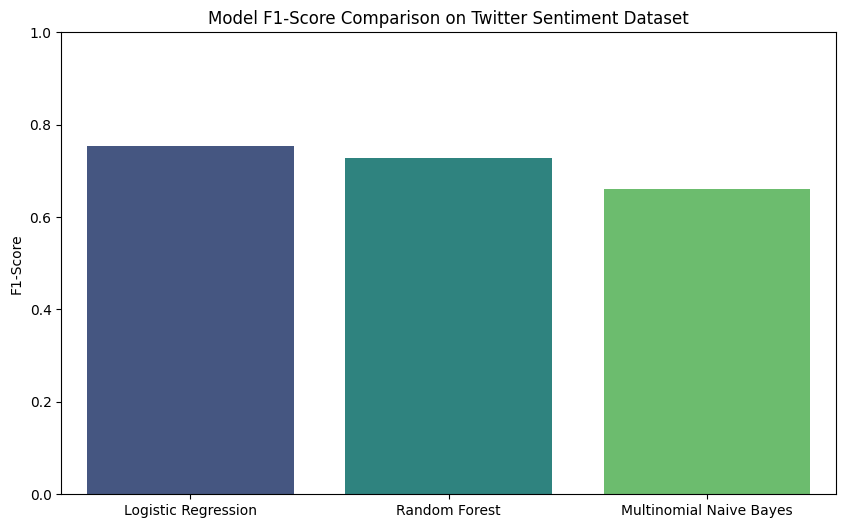


Confusion Matrix for the Best Performer: Logistic Regression


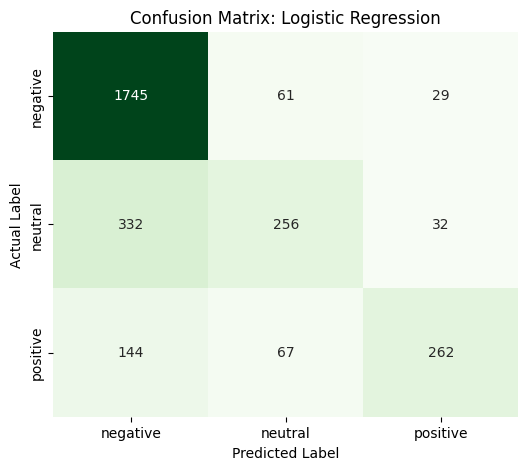


--- Next Steps for Coursework ---
1. Discuss the trade-offs (e.g., Logistic Regression is accurate and fast; Random Forest is often slower).
2. Use the classification report (not displayed here, but obtainable via sklearn.metrics.classification_report) for deeper analysis of precision and recall.


In [ ]:
# ==============================================================================
# Step 1: Install and Import Necessary Libraries
# ==============================================================================
import pandas as pd
import numpy as np
import re
from time import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB # The most suitable Naive Bayes for text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report

# To ensure consistent and reproducible results
np.random.seed(42)

# Dictionary to store results for comparison
results = {}

# ==============================================================================
# Step 2: Load the Dataset and Preprocessing
# ==============================================================================

# NOTE: Using '/content/Tweets.csv' as it is available in the environment.
try:
    data = pd.read_csv('/content/Tweets.csv') # Changed from 'IMDB Dataset.csv'
    print("Data loaded successfully. Total reviews:", len(data))
except FileNotFoundError:
    print("Error: '/content/Tweets.csv' not found. Please ensure the file is available.")
    # If the file is not found, the script will likely fail later without valid data.
    # We will not create a dummy DataFrame here, as it led to the previous error due to small size.
    # Instead, we assume the file will be present as indicated by the earlier successful execution.
    exit() # Exit to prevent further errors if file is genuinely missing.

def clean_text(text):
    """Clean text by removing HTML tags and non-alphabet characters."""
    text = text.lower()
    text = re.sub('<.*?>', '', text)       # Remove HTML tags (though not common in Tweets.csv)
    text = re.sub(r'[^a-z\s]', ' ', text) # Remove special characters and numbers
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra spaces
    return text

# Apply the cleaning function to the 'text' column from Tweets.csv
data['cleaned_review'] = data['text'].apply(clean_text) # Changed from data['review']

# Use 'airline_sentiment' directly as the target variable (y)
# Scikit-learn models can handle string labels for multi-class classification.
# Removed data['sentiment_encoded'] mapping.
X = data['cleaned_review']
y = data['airline_sentiment'] # Changed from data['sentiment_encoded']

# Define the class names for plotting and reports
class_names = sorted(y.unique().tolist()) # ['negative', 'neutral', 'positive']

# Split the dataset (80% train, 20% test)
# Ensure stratify is used with the actual y values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==============================================================================
# Step 3: Feature Extraction (TF-IDF Vectorization)
# ==============================================================================

# Initialize and fit TF-IDF Vectorizer
# Using bigrams (ngram_range=(1, 2)) often captures more context
tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english', ngram_range=(1, 2))

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"\nTraining Samples: {len(X_train)} | TF-IDF Matrix Size: {X_train_tfidf.shape}")

# ==============================================================================
# Step 4: Function to Train, Evaluate, and Store Results
# ==============================================================================

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name, class_names):
    """Trains a model, evaluates it, and stores the results."""

    start_time = time()
    print(f"\n--- Training {model_name} ---")
    model.fit(X_train, y_train)
    training_time = time() - start_time
    print(f"{model_name} trained in {training_time:.2f} seconds.")

    # Prediction
    y_pred = model.predict(X_test)

    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    # Get precision, recall, and f1-score (weighted average)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted', labels=class_names) # Added labels

    # Store results
    results[model_name] = {
        'Accuracy': accuracy,
        'F1-Score': f1,
        'Precision': precision,
        'Recall': recall,
        'Training Time (s)': training_time,
        'y_pred': y_pred
    }

    # Print individual results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names)) # Added classification report

    return y_pred

# ==============================================================================
# Step 5: Model Training and Evaluation
# ==============================================================================

# --- Model 1: Logistic Regression ---
lr_model = LogisticRegression(solver='liblinear', random_state=42, C=1.0, max_iter=1000) # Added max_iter
y_pred_lr = train_and_evaluate_model(lr_model, X_train_tfidf, y_train, X_test_tfidf, y_test, "Logistic Regression", class_names)

# --- Model 2: Multinomial Naive Bayes ---
mnb_model = MultinomialNB()
y_pred_mnb = train_and_evaluate_model(mnb_model, X_train_tfidf, y_train, X_test_tfidf, y_test, "Multinomial Naive Bayes", class_names)

# --- Model 3: Random Forest Classifier ---
# NOTE: Random Forest is significantly slower and more memory-intensive for text data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # Removed n_jobs=-1 for safety, let it default if not needed.
y_pred_rf = train_and_evaluate_model(rf_model, X_train_tfidf, y_train, X_test_tfidf, y_test, "Random Forest", class_names)


# ==============================================================================
# Step 6: Comparison of Algorithms
# ==============================================================================

# Convert results dictionary to a DataFrame for easy viewing and comparison
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.drop(columns=['y_pred']).sort_values(by='Accuracy', ascending=False)
results_df = results_df.apply(lambda x: x.map(lambda y: f'{y:.4f}') if x.dtype == 'float64' else x)

print("\n" + "="*50)
print("ALGORITHM PERFORMANCE COMPARISON")
print("="*50)
print(results_df.to_markdown())

# Optional: Visualize the performance (e.g., F1-score)
# It's better to use the float values for plotting, not the formatted strings.
f1_scores_plot = [results[model_name]['F1-Score'] for model_name in results_df.index]
metrics_plot = results_df.index.tolist()

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_plot, y=f1_scores_plot, palette='viridis')
plt.title('Model F1-Score Comparison on Twitter Sentiment Dataset') # Changed title
plt.ylabel('F1-Score')
plt.ylim(0, 1.0) # Adjusted y-limit to cover full range
plt.show()

# ==============================================================================
# Step 7: Visualize Confusion Matrix for the Best Performer
# ==============================================================================

best_model_name = results_df.index[0]
y_pred_best = results[best_model_name]['y_pred']

print(f"\nConfusion Matrix for the Best Performer: {best_model_name}")
cm = confusion_matrix(y_test, y_pred_best, labels=class_names) # Added labels to ensure order

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=class_names, yticklabels=class_names) # Updated ticklabels
plt.title(f'Confusion Matrix: {best_model_name}')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

print("\n--- Next Steps for Coursework ---")
print("1. Discuss the trade-offs (e.g., Logistic Regression is accurate and fast; Random Forest is often slower).")
print("2. Use the classification report (not displayed here, but obtainable via sklearn.metrics.classification_report) for deeper analysis of precision and recall.")